In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
import seaborn as sns

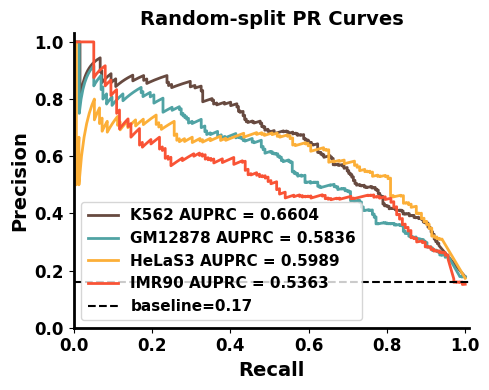

In [9]:
#Bi-LSTM results-random-split
#PR
names = ["K562","GM12878","HeLaS3","IMR90"]
#colors = ['#68AC57','#497EB2','#8E549E','#D2352C']
#colors = ['#5A6E9C', '#659EC7', '#92C7C7', '#99C68E', '#C9D179']
#colors = ['#FC8002', '#369F2D', '#4995C6', '#9B3A4D']
colors = ['#674a40','#50a3a4','#fcaf38','#f95335']
#colors = ['#77C6C6','#FA7952','#8EC58C','#AD87C1']
#colors = ['red','blue','green','black']
auPR = []
# plt.figure(figsize=(4,3))
fig, ax = plt.subplots(figsize=(5, 4))
i = 0
for cell in names:

    df = pd.read_csv(f'figureData/PR/{cell}.30.pr_data.csv')
    #aupr = auc(df['Recall'][1:], df['Precision'][1:])
    aupr = auc(df['Recall'], df['Precision'])
    #print(aupr)
    auPR.append(aupr)
    ax.plot(df['Recall'], df['Precision'],label=f'{cell} AUPRC = {aupr:.4f}',linewidth=2, color=colors[i])
    i+=1
    
plt.axhline(y=0.16, color='black', linestyle='--', label='baseline=0.17')
plt.xlim(0, 1.01)
plt.ylim(0, 1.03)
plt.xlabel('Recall',fontsize=14,fontweight='bold')
plt.ylabel('Precision',fontsize=14,fontweight='bold')
plt.title('Random-split PR Curves',fontsize=14,fontweight='bold')

#plt.tick_params(axis='both', which='major', labelsize=14,labelweight='bold')


for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(12)  # Set font size
    label.set_fontweight('bold')  # Set font weight


ax.spines['top'].set_linewidth(0)   
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)  
ax.spines['right'].set_linewidth(0) 

#plt.legend()
#plt.legend(loc='lower left', bbox_to_anchor=(0, 0.05),fontsize='8')
plt.legend(loc='lower left',prop={'weight': 'bold','size':11})
plt.tight_layout()
#plt.savefig('figs/Random-splitPRCurves.png',dpi=300,bbox_inches='tight')

re = pd.DataFrame()
re['RS'] = auPR
re['cell'] = names


plt.show()

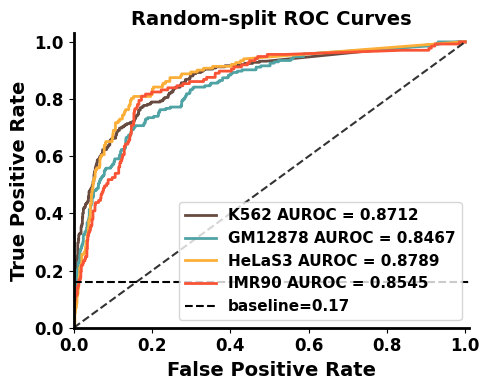

In [12]:
#Bi-LSTM results-random-split
#roc
names = ["K562","GM12878","HeLaS3","IMR90"]
#colors = ['#68AC57','#497EB2','#8E549E','#D2352C']
#colors = ['#5A6E9C', '#659EC7', '#92C7C7', '#99C68E', '#C9D179']
#colors = ['#FC8002', '#369F2D', '#4995C6', '#9B3A4D']
auROC_RS = []
# plt.figure(figsize=(4,3))
fig, ax = plt.subplots(figsize=(5, 4))
i = 0
for cell in names:

    df = pd.read_csv(f'figureData/PR/{cell}.30.roc_data.csv')
    #aupr = auc(df['Recall'][1:], df['Precision'][1:])
    aupr = auc(df['FPR'], df['TPR'])
    #print(aupr)
    auROC_RS.append(aupr)
    ax.plot(df['FPR'], df['TPR'],label=f'{cell} AUROC = {aupr:.4f}',linewidth=2, color=colors[i])
    i+=1
    
plt.plot([0, 1], [0, 1], linestyle='--',color='black',alpha=.8)
plt.axhline(y=0.16, color='black', linestyle='--', label='baseline=0.17')
plt.xlim(0, 1.01)
plt.ylim(0, 1.03)
plt.xlabel('False Positive Rate',fontsize=14,fontweight='bold')
plt.ylabel('True Positive Rate',fontsize=14,fontweight='bold')
plt.title('Random-split ROC Curves',fontsize=14,fontweight='bold')

#plt.tick_params(axis='both', which='major', labelsize=14,labelweight='bold')


for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(12)  # Set font size
    label.set_fontweight('bold')  # Set font weight


ax.spines['top'].set_linewidth(0)   
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)  
ax.spines['right'].set_linewidth(0) 

#plt.legend()
#plt.legend(loc='lower left', bbox_to_anchor=(0, 0.05),fontsize='8')
plt.legend(loc='lower right',prop={'weight': 'bold','size':11})
plt.tight_layout()
plt.savefig('figs/Random-splitROCCurves.png',dpi=300,bbox_inches='tight')


re['RSROC'] = auROC_RS



plt.show()

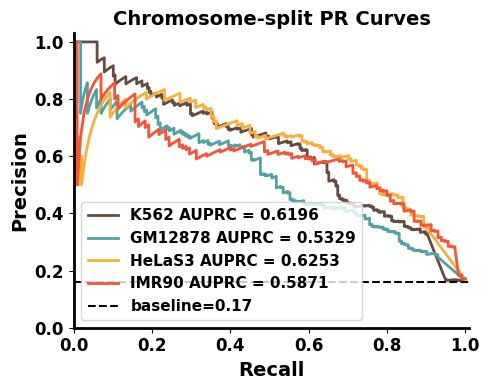

In [13]:
#Bi-LSTM results-Chromosome-split
#PR
names = ["K562","GM12878","HeLaS3","IMR90"]
auPR2 = []
fig, ax = plt.subplots(figsize=(5, 4))
i = 0
for cell in names:
    df = pd.read_csv(f'figureData/PR/{cell}.30.ChromSplit.pr_data.csv')
    #aupr = auc(df['Recall'][1:], df['Precision'][1:])
    aupr = auc(df['Recall'], df['Precision'])
    #print(aupr)
    auPR2.append(aupr)
    ax.plot(df['Recall'], df['Precision'],label=f'{cell} AUPRC = {aupr:.4f}',linewidth=2,color=colors[i])
    i+=1
    
plt.axhline(y=0.16, color='black', linestyle='--', label='baseline=0.17')
plt.xlim(0, 1.01)
plt.ylim(0, 1.03)
plt.xlabel('Recall',fontsize=14,fontweight='bold')
plt.ylabel('Precision',fontsize=14,fontweight='bold')
plt.title('Chromosome-split PR Curves',fontsize=14,fontweight='bold')

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(12)  # Set font size
    label.set_fontweight('bold')  # Set font weight

ax.spines['top'].set_linewidth(0)   
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)  
ax.spines['right'].set_linewidth(0) 

#plt.legend()
#plt.legend(loc='lower left', bbox_to_anchor=(0, 0.05),fontsize='8')
plt.legend(loc='lower left',prop={'weight': 'bold','size':11})
plt.tight_layout()
#plt.savefig('figs/chromos-splitPRCurves.png',dpi=300,bbox_inches='tight')

re['CS'] = auPR2



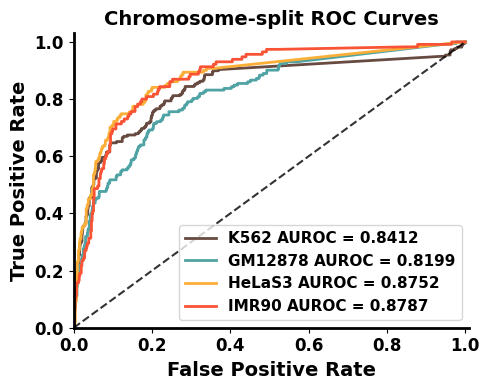

In [14]:
#Bi-LSTM results-chromosome-split
#roc
names = ["K562","GM12878","HeLaS3","IMR90"]
#colors = ['#68AC57','#497EB2','#8E549E','#D2352C']
#colors = ['#5A6E9C', '#659EC7', '#92C7C7', '#99C68E', '#C9D179']
#colors = ['#FC8002', '#369F2D', '#4995C6', '#9B3A4D']
ROC_CS = []
# plt.figure(figsize=(4,3))
fig, ax = plt.subplots(figsize=(5, 4))
i = 0
for cell in names:

    df = pd.read_csv(f'figureData/PR/{cell}.30.ChromSplit.roc_data.csv')
    #aupr = auc(df['Recall'][1:], df['Precision'][1:])
    aupr = auc(df['FPR'], df['TPR'])
    #print(aupr)
    ROC_CS.append(aupr)
    ax.plot(df['FPR'], df['TPR'],label=f'{cell} AUROC = {aupr:.4f}',linewidth=2, color=colors[i])
    i+=1
    
plt.plot([0, 1], [0, 1], linestyle='--',color='black',alpha=.8)
#plt.axhline(y=0.16, color='black', linestyle='--', label='baseline=0.17')
plt.xlim(0, 1.01)
plt.ylim(0, 1.03)
plt.xlabel('False Positive Rate',fontsize=14,fontweight='bold')
plt.ylabel('True Positive Rate',fontsize=14,fontweight='bold')
plt.title('Chromosome-split ROC Curves',fontsize=14,fontweight='bold')

#plt.tick_params(axis='both', which='major', labelsize=14,labelweight='bold')


for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(12)  # Set font size
    label.set_fontweight('bold')  # Set font weight


ax.spines['top'].set_linewidth(0)   
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)  
ax.spines['right'].set_linewidth(0) 

#plt.legend()
#plt.legend(loc='lower left', bbox_to_anchor=(0, 0.05),fontsize='8')
plt.legend(loc='lower right',prop={'weight': 'bold','size':11})
plt.tight_layout()
plt.savefig('figs/chromos-splitROCCurves.png',dpi=300,bbox_inches='tight')


re['ROC_CS'] = ROC_CS



plt.show()

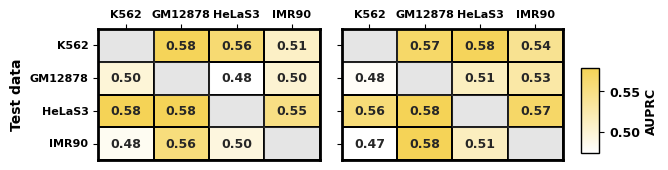

In [17]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.font_manager import FontProperties

# 创建从白色到红色的颜色映射
white_red = LinearSegmentedColormap.from_list("white_red", ["white", "#f5d356"])


#Random-split cross PR
testCell = ['K562','GM12878','HeLaS3','IMR90']

K562 = [0.694220051,0.500992882,0.580882678,0.484239496]
GM12878 = [0.578934252,0.648075494,0.580092922,0.557410294]
HeLaS3 = [0.56322161,0.476407259,0.68517432,0.496906241]
IMR90 = [0.511588619,0.504235499,0.552399199,0.6927877]

data1 = {
    'K562': K562,
    'GM12878': GM12878,
    'HeLaS3': HeLaS3,
    'IMR90': IMR90
}
df1 = pd.DataFrame(data1, index=testCell)


#chromosome-split cross PR
a_K562 = [0.719086741,0.477970828,0.557506008,0.473294543]
a_GM12878 = [0.567415719,0.66580998,0.578772998,0.577749988]
a_HeLaS3 = [0.575648831,0.51254293,0.692410285,0.513644204]
a_IMR90 = [0.541756313,0.528772838,0.568055907,0.6888937]


data2 = {
    'K562': a_K562,
    'GM12878': a_GM12878,
    'HeLaS3': a_HeLaS3,
    'IMR90': a_IMR90
}
df2 = pd.DataFrame(data2, index=testCell)

np.fill_diagonal(df1.values, np.nan)
np.fill_diagonal(df2.values, np.nan)

#print(df1)
##plot figures
fig, axs = plt.subplots(1, 2, figsize=(6, 1.7),sharey=True)

annot_kws = {"weight": "bold", "size": 9}

ax1 = sns.heatmap(df1, annot=True, cmap=white_red, fmt=".2f", cbar_kws={'label': 'AUPRC'}, 
                  linecolor='black', linewidths=0.003,
                  ax = axs[0],cbar=False,annot_kws=annot_kws)
for i in range(len(df1)):
    axs[0].add_patch(plt.Rectangle((i, i), 1, 1, fill=True, color='gray', alpha=0.2))

axs[0].xaxis.tick_top()  # 将第二个热图的x轴移动到顶部
axs[0].xaxis.set_label_position('top')  # 设置x轴标签的位置到顶部
#axs[0].set_xlabel('Random-split models',fontsize=10,fontweight='bold')
axs[0].set_ylabel('Test data',fontsize=10,fontweight='bold')


cbar_ax = fig.add_axes([0.93, .15, .03, .5])

ax2 = sns.heatmap(df2, annot=True, cmap=white_red, fmt=".2f", cbar_kws={'label': 'AUPRC'}, 
                  linecolor='black', linewidths=0.003,
                  ax = axs[1],cbar=True,
                  cbar_ax=cbar_ax,annot_kws=annot_kws)

axs[1].xaxis.tick_top()  # 将第二个热图的x轴移动到顶部
axs[1].xaxis.set_label_position('top')  # 设置x轴标签的位置到顶部
#axs[1].set_xlabel('Chromo-split models',fontsize=10,fontweight='bold')

for i in range(len(df2)):
    axs[1].add_patch(plt.Rectangle((i, i), 1, 1, fill=True, color='gray', alpha=0.2))


for label in axs[0].get_xticklabels() + axs[0].get_yticklabels():
    label.set_fontsize(8)
    label.set_fontweight('bold')

for label in axs[1].get_xticklabels() + axs[1].get_yticklabels():
    label.set_fontsize(8)
    label.set_fontweight('bold')

# 添加黑色实线外圈
for ax in [ax1, ax2]:
    for _, spine in ax.spines.items():
        spine.set_visible(True)
        spine.set_linewidth(2)
        spine.set_edgecolor("black")

# 设置图例外围线为黑色实线
cbar_ax.spines['outline'].set_visible(True)
cbar_ax.spines['outline'].set_edgecolor('black')
cbar_ax.spines['outline'].set_linewidth(1)

# 设置图例的标签字体
cbar_ax.set_ylabel('AUPRC', weight='bold', size=9)


font_prop = FontProperties(weight='bold', size=9)

for label in cbar_ax.get_yticklabels():
    label.set_fontproperties(font_prop)
    
plt.subplots_adjust(wspace=0.1) 

#plt.tight_layout()
#plt.savefig(f'figs/CrossSample-PRC2.png',dpi=300, bbox_inches='tight')


plt.show()


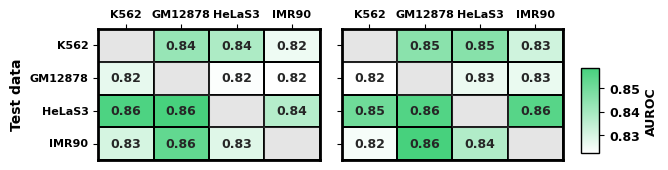

In [18]:
#[model].[test].RandomCross.roc_data.csv

#Random-split cross ROC

testCell = ['K562','GM12878','HeLaS3','IMR90']
df1 = pd.DataFrame(index=testCell)
for model in testCell:
    eachList = []
    for test in testCell:
        dfx = pd.read_csv(f'binsFea/crossModel/{model}.{test}.RandomCross.roc_data.csv')
        aucx = auc(dfx['FPR'], dfx['TPR'])
        eachList.append(aucx)
    df1[model] = eachList
    


df2 = pd.DataFrame(index=testCell)
for model in testCell:
    eachList = []
    for test in testCell:
        dfx = pd.read_csv(f'binsFea/crossModel/{model}.{test}.ChromoSplitCross.roc_data.csv')
        aucx = auc(dfx['FPR'], dfx['TPR'])
        eachList.append(aucx)
    df2[model] = eachList

# 修改对角线元素为NaN
for i in range(len(df1)):
    df1.iloc[i, i] = np.nan

for i in range(len(df2)):
    df2.iloc[i, i] = np.nan
    


# 创建从白色到红色的颜色映射
blue_red = LinearSegmentedColormap.from_list("blue_red", ["white", "#47d17d"])

##plot figures
fig, axs = plt.subplots(1, 2, figsize=(6, 1.7),sharey=True)

annot_kws = {"weight": "bold", "size": 9}

ax1 = sns.heatmap(df1, annot=True, cmap=blue_red, fmt=".2f", cbar_kws={'label': 'AUPRC'}, 
                  linecolor='black', linewidths=0.003,
                  ax = axs[0],cbar=False,annot_kws=annot_kws)


axs[0].xaxis.tick_top()  # 将第二个热图的x轴移动到顶部
axs[0].xaxis.set_label_position('top')  # 设置x轴标签的位置到顶部
#axs[0].set_xlabel('Random-split models',fontsize=10,fontweight='bold')
axs[0].set_ylabel('Test data',fontsize=10,fontweight='bold')


cbar_ax = fig.add_axes([0.93, .15, .03, .5])

ax2 = sns.heatmap(df2, annot=True, cmap=blue_red, fmt=".2f", cbar_kws={'label': 'AUPRC'}, 
                  linecolor='black', linewidths=0.003,
                  ax = axs[1],cbar=True,
                  cbar_ax=cbar_ax,annot_kws=annot_kws,)

axs[1].xaxis.tick_top() 
axs[1].xaxis.set_label_position('top')  # 设置x轴标签的位置到顶部
#axs[1].set_xlabel('Chromo-split models',fontsize=10,fontweight='bold')


for label in axs[0].get_xticklabels() + axs[0].get_yticklabels():
    label.set_fontsize(8)
    label.set_fontweight('bold')

for label in axs[1].get_xticklabels() + axs[1].get_yticklabels():
    label.set_fontsize(8)
    label.set_fontweight('bold')

# 添加黑色实线外圈
for ax in [ax1, ax2]:
    for _, spine in ax.spines.items():
        spine.set_visible(True)
        spine.set_linewidth(2)
        spine.set_edgecolor("black")

# 设置图例外围线为黑色实线
cbar_ax.spines['outline'].set_visible(True)
cbar_ax.spines['outline'].set_edgecolor('black')
cbar_ax.spines['outline'].set_linewidth(1)

# 设置图例的标签字体
cbar_ax.set_ylabel('AUROC', weight='bold', size=9)


font_prop = FontProperties(weight='bold', size=9)

for label in cbar_ax.get_yticklabels():
    label.set_fontproperties(font_prop)


for i in range(len(df1)):
    axs[0].add_patch(plt.Rectangle((i, i), 1, 1, fill=True, color='gray', alpha=0.2))

for i in range(len(df2)):
    axs[1].add_patch(plt.Rectangle((i, i), 1, 1, fill=True, color='gray', alpha=0.2))


plt.subplots_adjust(wspace=0.1) 

#plt.tight_layout()
#plt.savefig(f'figs/CrossSample-ROC2.png',dpi=300, bbox_inches='tight')


plt.show()



/var/folders/q3/xbkpk0f13k7bv_vmk9ycybfm0000gn/T/ipykernel_76656/1238917645.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='label', y='row_mean', data=vec, palette=['gray', violinColor[i]], split=False, ax=ax,inner='box', linewidth=0.5)
/var/folders/q3/xbkpk0f13k7bv_vmk9ycybfm0000gn/T/ipykernel_76656/1238917645.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Neg', 'Pos'], fontsize=12)


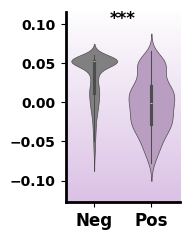

/var/folders/q3/xbkpk0f13k7bv_vmk9ycybfm0000gn/T/ipykernel_76656/1238917645.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='label', y='row_mean', data=vec, palette=['gray', violinColor[i]], split=False, ax=ax,inner='box', linewidth=0.5)
/var/folders/q3/xbkpk0f13k7bv_vmk9ycybfm0000gn/T/ipykernel_76656/1238917645.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Neg', 'Pos'], fontsize=12)


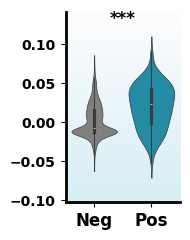

/var/folders/q3/xbkpk0f13k7bv_vmk9ycybfm0000gn/T/ipykernel_76656/1238917645.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='label', y='row_mean', data=vec, palette=['gray', violinColor[i]], split=False, ax=ax,inner='box', linewidth=0.5)
/var/folders/q3/xbkpk0f13k7bv_vmk9ycybfm0000gn/T/ipykernel_76656/1238917645.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Neg', 'Pos'], fontsize=12)


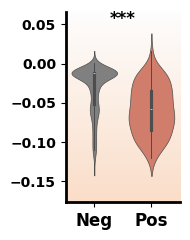

/var/folders/q3/xbkpk0f13k7bv_vmk9ycybfm0000gn/T/ipykernel_76656/1238917645.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='label', y='row_mean', data=vec, palette=['gray', violinColor[i]], split=False, ax=ax,inner='box', linewidth=0.5)
/var/folders/q3/xbkpk0f13k7bv_vmk9ycybfm0000gn/T/ipykernel_76656/1238917645.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Neg', 'Pos'], fontsize=12)


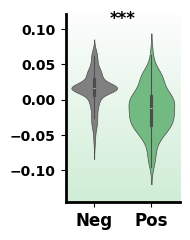

In [21]:
from scipy.stats import ttest_ind
from scipy import stats

cells = ['K562','GM12878','HeLaS3','IMR90']
cmapColor = ['#b783cc','#AFDCEC','#F5BC92','#9fdbac']
violinColor = ['#BC98C8','#0D98BA','#E2725B','#66c57b']
#紫 蓝 橘 绿


i = 0
for cell in cells:

    vec = pd.read_csv(f'binsFea/feaVec/{cell}_concatenated_output.csv')
    data = vec.drop(columns=['label'])
    labels = vec['label']
    data['row_mean'] = data.mean(axis=1)
    vec['row_mean'] = data['row_mean']
    
    group_neg = vec[vec['label']==0]['row_mean'].tolist()
    group_pos = vec[vec['label']==1]['row_mean'].tolist()
    
    _, p_value = stats.ttest_ind(group_neg, group_pos)
    
    if p_value < 0.001:
        significance = '***'
    elif p_value < 0.01:
        significance = '**'
    elif p_value < 0.05:
        significance = '*'
    else:
        significance = 'n.s.'
    
    
    cmap = LinearSegmentedColormap.from_list('purple_gradient', [cmapColor[i], '#fcfcfc'])
    
    fig, ax = plt.subplots(figsize=(2,2.5))
    
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient)).T
    ax.imshow(gradient, aspect='auto', cmap=cmap, extent=[-0.5, 1.5, vec['row_mean'].min()-0.05, vec['row_mean'].max()+0.05], alpha=0.5,origin='lower')
    
    sns.violinplot(x='label', y='row_mean', data=vec, palette=['gray', violinColor[i]], split=False, ax=ax,inner='box', linewidth=0.5)
    i+=1
    
    #plt.title('K562', fontsize=16, weight='bold', color='white', backgroundcolor='purple', pad=8)
    
        # 获取条形图的位置信息
    #x_coords = [p.get_x() + p.get_width() / 2 for p in bar_plot.patches]
    #max_height = toplast['score'].max()
    #print(x_coords)
    
    y, h, col = vec['row_mean'].max() + 0.01, 0.02, 'black'
    #ax.text(0.5, y + h, f"P = {p_value:.2e}", ha='center', va='bottom', color=col, fontsize=12,fontweight='bold')
    
    if significance != 'n.s.':
        #ax.plot(2, [y + 0.01] * len(2), color='black', lw=2)  # 横线
        ax.text(0.5, y + 0.02, f'{significance}', ha='center', va='bottom',color=col,fontsize=12,fontweight='bold')  # p值和
        
    ax.spines['top'].set_linewidth(0)   
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)  
    ax.spines['right'].set_linewidth(0) 
    
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(10)
        label.set_fontweight('bold')
    
    ax.set_xlabel('')
    ax.set_ylabel('', fontsize=14)
    ax.set_xticklabels(['Neg', 'Pos'], fontsize=12)
    ax.yaxis.set_label_coords(-0.1, 0.5)
    
        
    plt.tight_layout()
    #plt.savefig(f'figs/{cell}_feavec_violin.png',dpi=300,bbox_inches='tight')
    
    plt.show()


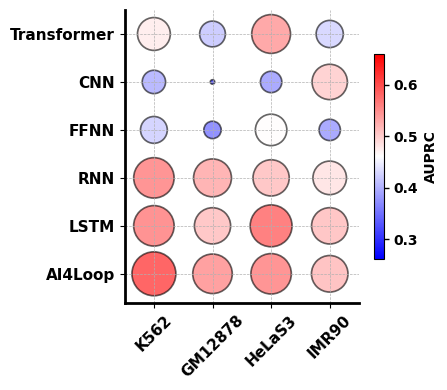

In [24]:

# 读取数据
PRdf = pd.read_csv('binsFea/compMethods/AUPRC_CompMeth.tsv', sep='\t')

# 定义细胞系和方法
cells = ['K562', 'GM12878', 'HeLaS3', 'IMR90']
methods = PRdf['Methods']

# 转换数据格式以适合绘制气泡图
data = PRdf.melt(id_vars=["Methods"], value_vars=cells, var_name="Cell Line", value_name="AUPRC")

# 定义颜色和气泡大小
norm = plt.Normalize(data['AUPRC'].min(), data['AUPRC'].max())
cmap = plt.cm.bwr

# 绘制气泡图
plt.figure(figsize=(4.5, 4))
bubble_sizes = data['AUPRC'] * 100  # 调整大小以适合气泡图
ax = plt.gca()

# 添加网格线
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# 绘制气泡图
sns.scatterplot(data=data, x='Cell Line', y='Methods', size='AUPRC', hue='AUPRC', palette='bwr', sizes=(10, 1000), edgecolor='black', legend=False, alpha=0.6, ax=ax)

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.7)
cbar.set_label('AUPRC',fontsize=10, fontweight='bold')

# 设置颜色条刻度字体大小和加粗
cbar.ax.tick_params(labelsize=10, width=1)
for label in cbar.ax.get_yticklabels():
    label.set_fontsize(10)
    label.set_fontweight('bold')
# 添加标题和标签
#ax.set_title('AUPRC Comparison Across Cell Lines and Methods', size=20)
ax.set_xlabel('')
ax.set_ylabel('')

ax.set_ylim(-0.6, len(PRdf["Methods"]) - 0.5)
ax.set_xlim(-0.5, len(cells)-0.5)
# 设置坐标轴线宽
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

# 设置标签字体
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(11)
    label.set_fontweight('bold')

# 调整图表布局以确保不被截断
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('/Users/daodao/Downloads/GEproject/figs/CompMeths.aupr2.png', dpi=300, bbox_inches='tight')

# 显示图表
plt.show()


In [ ]:

# 读取数据
PRdf = pd.read_csv('binsFea/compMethods/AUC_CompMeth.tsv', sep='\t')

# 定义细胞系和方法
cells = ['K562', 'GM12878', 'HeLaS3', 'IMR90']
methods = PRdf['Methods']

# 转换数据格式以适合绘制气泡图
data = PRdf.melt(id_vars=["Methods"], value_vars=cells, var_name="Cell Line", value_name="AUPRC")

# 定义颜色和气泡大小
norm = plt.Normalize(data['AUPRC'].min(), data['AUPRC'].max())
cmap = plt.cm.PiYG

# 绘制气泡图
plt.figure(figsize=(4.5, 4))
bubble_sizes = data['AUPRC'] * 100  # 调整大小以适合气泡图
ax = plt.gca()

# 添加网格线
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# 绘制气泡图
sns.scatterplot(data=data, x='Cell Line', y='Methods', size='AUPRC', hue='AUPRC', palette='PiYG', sizes=(10, 1000), edgecolor='black', legend=False, alpha=0.6, ax=ax)

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.7)
cbar.set_label('AUROC',fontsize=10, fontweight='bold')

# 设置颜色条刻度字体大小和加粗
cbar.ax.tick_params(labelsize=10, width=1)
for label in cbar.ax.get_yticklabels():
    label.set_fontsize(10)
    label.set_fontweight('bold')

# 添加标题和标签
#ax.set_title('AUPRC Comparison Across Cell Lines and Methods', size=20)
ax.set_xlabel('')
ax.set_ylabel('')

ax.set_ylim(-0.6, len(PRdf["Methods"]) - 0.5)
ax.set_xlim(-0.5, len(cells)-0.5)
# 设置坐标轴线宽
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

# 设置标签字体
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(11)
    label.set_fontweight('bold')

# 调整图表布局以确保不被截断
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('/Users/daodao/Downloads/GEproject/figs/CompMeths.auc2.png', dpi=300, bbox_inches='tight')

# 显示图表
plt.show()


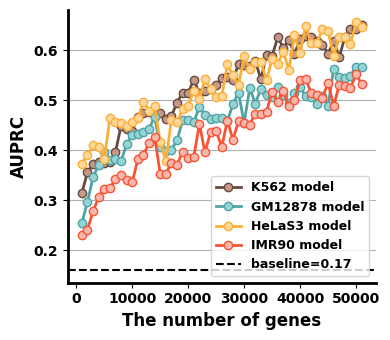

In [22]:
df = pd.read_csv('binsFea/IFSbinsGEfea/all_geneIFS_PR.csv')
#df.head()
fig, ax = plt.subplots(figsize=(4,3.5))

cells = ['K562','GM12878','HeLaS3','IMR90']
#colors = ['#FC8002', '#369F2D', '#4995C6', '#9B3A4D']
#colors = ['#A1D8D2','#FA7952','#8EC58C','#AD87C1']
colors = ['#674a40','#50a3a4','#fcaf38','#f95335']
fillCol = ['#c59888','#95d4d5','#ffd799','#f6b7ac']
#colors = ['#5A6E9C', '#659EC7', '#92C7C7', '#99C68E']#, '#C9D179'
i = 0
for cell in cells:
    ax.plot(df['genes'],df[cell],color=colors[i],linewidth=2, linestyle='-',marker='o',
            markersize=6, markerfacecolor=fillCol[i],label =f'{cell} model')
    i+=1

#plt.title('AUPRCs as gene number increases',fontsize=16,fontweight='bold')
plt.xlabel('The number of genes',fontsize=12,fontweight='bold')
plt.ylabel('AUPRC',fontsize=12,fontweight='bold')
plt.axhline(y=0.16, color='black', linestyle='--', label='baseline=0.17')

ax.spines['top'].set_linewidth(0)   
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)  
ax.spines['right'].set_linewidth(0) 

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(10)  # Set font size
    label.set_fontweight('bold')  # Set font weight
    
plt.grid(True,which='both', axis='y')  # Adding grid lines for better visibility

plt.legend(loc='lower right',prop={'weight': 'bold','size':9})#,bbox_to_anchor=(0.2, 0))
plt.tight_layout()
#plt.savefig('figs/geneIFS.aupr.png', dpi=300, bbox_inches='tight')


plt.show()

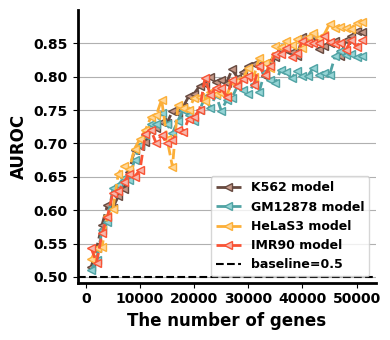

In [23]:
df = pd.read_csv('binsFea/IFSbinsGEfea/all_geneIFS_ROC.csv')

fig, ax = plt.subplots(figsize=(4,3.5))

cells = ['K562','GM12878','HeLaS3','IMR90']
#colors = ['#FC8002', '#369F2D', '#4995C6', '#9B3A4D']
#colors = ['#A1D8D2','#FA7952','#8EC58C','#AD87C1']
colors = ['#674a40','#50a3a4','#fcaf38','#f95335']

#colors = ['#5A6E9C', '#659EC7', '#92C7C7', '#99C68E']#, '#C9D179'
i = 0
for cell in cells:
    ax.plot(df['genes'],df[cell],color=colors[i],linewidth=2, linestyle='--',marker='<',markersize=6, 
            markerfacecolor=fillCol[i],label =f'{cell} model')
    i+=1

#plt.title('AUPRCs as gene number increases',fontsize=16,fontweight='bold')
plt.xlabel('The number of genes',fontsize=12,fontweight='bold')
plt.ylabel('AUROC',fontsize=12,fontweight='bold')
plt.axhline(y=0.5, color='black', linestyle='--', label='baseline=0.5')

ax.spines['top'].set_linewidth(0)   
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)  
ax.spines['right'].set_linewidth(0) 

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(10)  # Set font size
    label.set_fontweight('bold')  # Set font weight
    
plt.grid(True,which='both', axis='y')
plt.legend(loc='lower right',prop={'weight': 'bold','size':9})#,bbox_to_anchor=(0.2, 0))
plt.tight_layout()
#plt.savefig('figs/geneIFS.auroc.png', dpi=300, bbox_inches='tight')


plt.show()